## Iris Dataset
Using this dataset as an example, we demonstrate the work on visualization, evaluation of the importance of features, selection of a model and metric for a given task.

The result achieved by the accuracy metric = 1.0

In [52]:
from sklearn import datasets

ds = datasets.load_iris()
print(ds.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

df = pd.DataFrame(ds.data, columns = ds.feature_names).rename(columns = {"sepal length (cm)" : "SepalLengthCm",
                                                              'petal length (cm)' : "PetalLengthCm",
                                                              "sepal width (cm)" : "SepalWidthCm",
                                                              "petal width (cm)":"PetalWidthCm"})
df["target"] = ds.target
df['Species'] = df["target"].apply(lambda x : ds.target_names[x])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

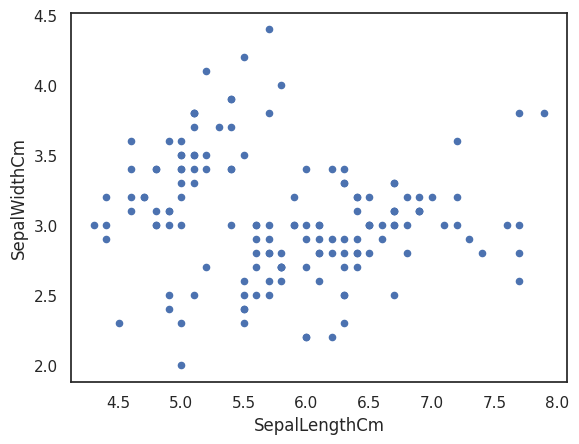

In [29]:
df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

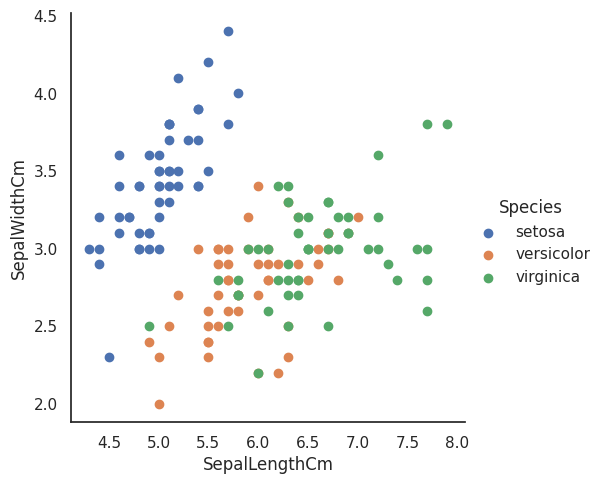

In [55]:

sns.FacetGrid(df, hue="Species", height=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()


The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.

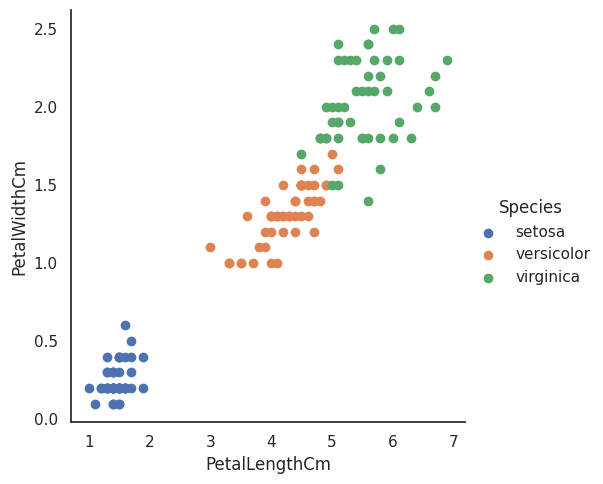

In [56]:
sns.FacetGrid(df, hue="Species", height=5) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()



As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.


<Axes: xlabel='Species', ylabel='PetalLengthCm'>

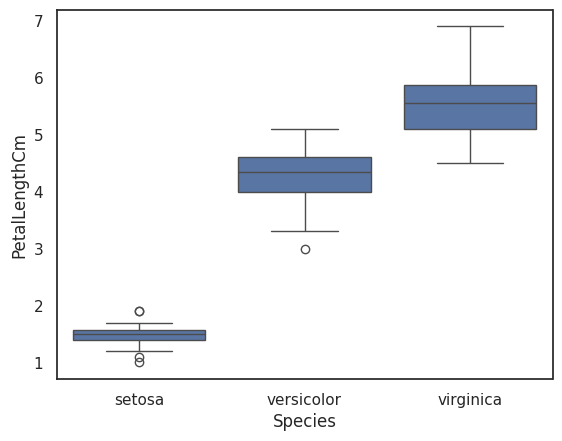

In [31]:
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'PetalLengthCm'}>],
       [<Axes: title={'center': 'SepalWidthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

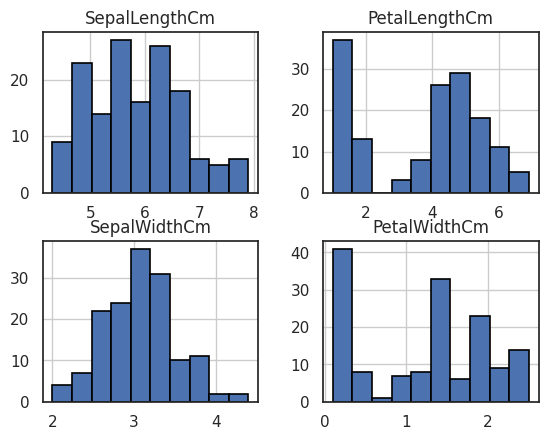

In [32]:
df.hist(["SepalLengthCm","PetalLengthCm","SepalWidthCm","PetalWidthCm"],edgecolor='black', linewidth=1.2)

#### Now let us see how the length and width vary according to the species

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

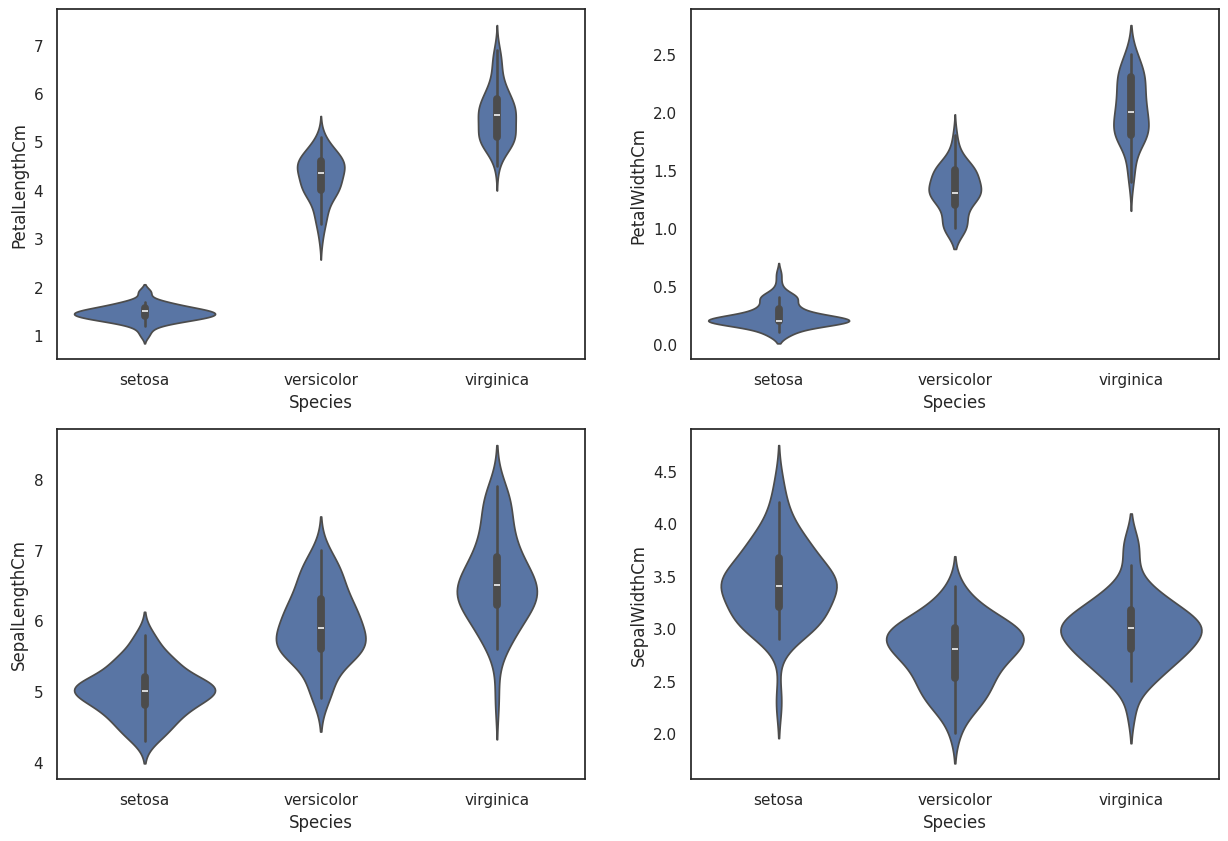

In [33]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

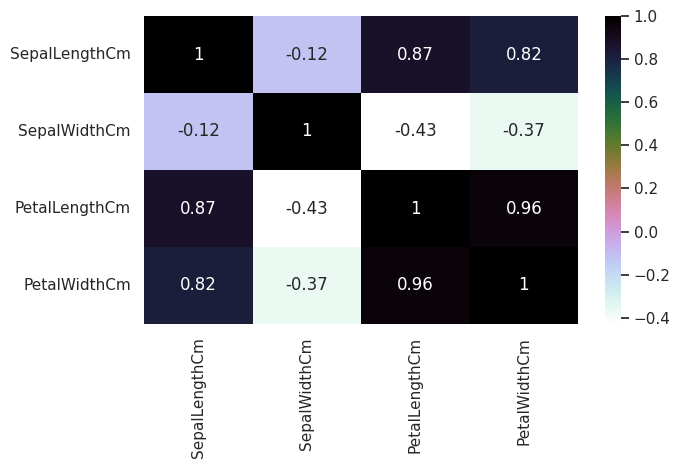

In [34]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.drop(["target","Species"],axis=1).corr(),annot=True,cmap='cubehelix_r')
plt.show()


 --->  Important observation : Petal Width and Length are strongly correlated, but Sepal Width and Length are not correlated. 

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
X = df.drop(["target","Species"],axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,shuffle=True)

In [36]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
47,4.6,3.2,1.4,0.2
25,5.0,3.0,1.6,0.2
18,5.7,3.8,1.7,0.3
27,5.2,3.5,1.5,0.2
85,6.0,3.4,4.5,1.6


### Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

from sklearn.metrics import accuracy_score

print("Accuracy of Decision tree using all features : ",accuracy_score(y_test, y_pred))

Accuracy of Decision tree using all features :  1.0


### SVM

In [58]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("Accuracy of SVM using all features : ", accuracy_score(y_test,y_pred_svc))

Accuracy of SVM using all features :  1.0


### KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = svc.predict(X_test)
print("Accuracy of SVM using all features : ", accuracy_score(y_test,y_pred_knn))

Accuracy of SVM using all features :  1.0
